In [1]:
import pandas as pd
import json
import io

In [2]:
file_path = '../Data/clean_sparkling.csv'
df = pd.read_csv(file_path)

In [3]:
df

,Name,Rating,Price,NumberOfRatings,Country,Winery,Vintage
0,P2 Plénitude Brut Champagne,4.7,349.99,341,France,Dom Pérignon,2002
1,La Grande Dame Brut Rosé Champagne,4.7,299.99,171,France,Veuve Clicquot,1998
2,Cristal Brut Champagne (Millésimé),4.6,299.99,2265,France,Louis Roederer,2005
3,Cristal Brut Champagne (Millésimé),4.6,249.99,24629,France,Louis Roederer,N.V.
4,Grande Cuvée Brut Champagne,4.6,179.99,14613,France,Krug,N.V.
...,...,...,...,...,...,...,...
1843,American Spumante,3.0,5.99,199,United States,J. Roget,N.V.
1844,Cava Brut,2.9,24.99,28,Spain,Elvi,N.V.
1845,Extra Dry (California Champagne),2.8,6.95,393,United States,Cook's,N.V.
1846,American Champagne Brut,2.7,4.99,884,United States,J. Roget,N.V.


In [4]:
# I was getting a runtime: out of memory error when running the model on the entire dataset so I filtered by province
# for only california wines. comment out the code below to run on the entire dataset.
NV_loc = df.loc[df['Vintage'] != 'N.V.']

In [5]:
new_df = NV_loc[['Rating', 'Price', 'NumberOfRatings', 'Vintage', 'Country']]

In [6]:
new_df

,Rating,Price,NumberOfRatings,Vintage,Country
0,4.7,349.99,341,2002,France
1,4.7,299.99,171,1998,France
2,4.6,299.99,2265,2005,France
7,4.6,169.95,5829,2008,France
8,4.6,269.99,3970,2009,France
...,...,...,...,...,...
1761,3.4,25.99,48,2013,Italy
1798,3.3,23.99,53,2018,Italy
1807,3.3,23.99,30,2016,Italy
1809,3.3,19.99,29,2015,Spain


In [7]:
data = new_df.values
X = data[:, 0:4]
rating = data[:, 0]
country = data[:, 4]

In [8]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(country)
encoded_country = label_encoder.transform(country)
encoded_country

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        8,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  3,  3,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 11, 11,  1,  1,  1, 11,  1,
        1,  1,  1, 11,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 11,  3,  1,  8,  1,  1,  1, 11,  1,  3,  3,  1, 11, 11,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,
        1,  1, 11,  1,  1,  1, 10,  4,  1,  1, 11, 11, 11,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  3,
        1,  1, 11, 10,  4,  1, 11,  8, 11,  1,  3, 11,  1,  1,  3,  1,  1,
       11,  1,  8, 11,  1, 10,  1,  3,  1,  3,  1,  8,  1,  1,  1, 11,  3,
        1,  8,  1,  1,  1,  1,  8,  1,  1,  1,  1,  3, 11,  3,  1,  1,  1,
        3,  1,  3,  1,  3, 11,  1,  1,  1,  1, 11,  1, 11,  3,  1,  1,  3,
       11,  8,  3, 11,  3,  8,  3, 10,  1,  1,  3,  1,  3, 10,  1,  1,  3,
        3,  1,  6,  1,  8

In [9]:
label_encoder.fit(rating)
encoded_rating = label_encoder.transform(rating)
encoded_rating

array([15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9

In [10]:
X = new_df['Price']
Y = encoded_country

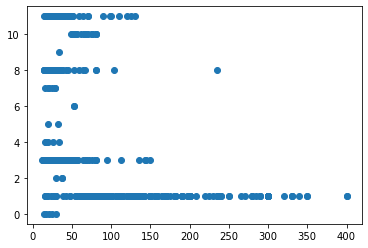

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)

In [12]:
# for label, original_class in zip(encoded_y, y):
#     print('Original Class: ' + str(original_class))
#     print('Encoded Label: ' + str(label))
#     print('-' * 12)

In [13]:
# from keras.utils import to_categorical

# # Step 2: One-hot encoding
# one_hot_y = to_categorical(encoded_y)
# one_hot_y

In [14]:
newest = {
    'Price': new_df['Price'],
    'NumberOfRatings': new_df['NumberOfRatings'],
    'Vintage': new_df['Vintage'],
    'Rating': encoded_rating.tolist(),
    'Country': encoded_country.tolist()
}
newest


{'Price': 0       349.99
 1       299.99
 2       299.99
 7       169.95
 8       269.99
          ...  
 1761     25.99
 1798     23.99
 1807     23.99
 1809     19.99
 1828     18.99
 Name: Price, Length: 464, dtype: float64,
 'NumberOfRatings': 0        341
 1        171
 2       2265
 7       5829
 8       3970
         ... 
 1761      48
 1798      53
 1807      30
 1809      29
 1828      50
 Name: NumberOfRatings, Length: 464, dtype: int64,
 'Vintage': 0       2002
 1       1998
 2       2005
 7       2008
 8       2009
         ... 
 1761    2013
 1798    2018
 1807    2016
 1809    2015
 1828    2018
 Name: Vintage, Length: 464, dtype: object,
 'Rating': [15,
  15,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,

In [15]:
encoded_df = pd.DataFrame(data=newest)

# encoded_df["Vintage"] = encoded_df.Vintage.to_numeric(int)

encoded_df["Vintage"] = pd.to_numeric(encoded_df["Vintage"])
encoded_df.dtypes

Price              float64
NumberOfRatings      int64
Vintage              int64
Rating               int64
Country              int64
dtype: object

In [16]:
# change target column to points to see how what factors contribute to points. same for cell below.
target = encoded_df["Rating"]

In [17]:
data = encoded_df.drop("Rating", axis=1)
feature_names = data.columns
data.head()

,Price,NumberOfRatings,Vintage,Country
0,349.99,341,2002,1
1,299.99,171,1998,1
2,299.99,2265,2005,1
7,169.95,5829,2008,1
8,269.99,3970,2009,1


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [19]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.16379310344827586

In [20]:
# increase n_estimators to get a more accurate model.
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.1896551724137931

In [21]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.3722064529478885, 'Price'),
 (0.3381015458786075, 'NumberOfRatings'),
 (0.1939862851962889, 'Vintage'),
 (0.09570571597721513, 'Country')]